In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/library/flawed_iris.csv

In [210]:
df = pd.read_csv("flawed_iris.csv")

In [211]:
print(df)

     septal_length septal_width  petal_length  petal_width   color  class
0              6.4          2.8           5.6          2.2   light    2.0
1              5.0          2.3           3.3          1.0  medium    1.0
2              4.9          2.5           4.5          1.7  medium    2.0
3              4.9          3.1           1.5          0.1    dark    0.0
4              5.7          3.8           1.7          0.3    dark    0.0
..             ...          ...           ...          ...     ...    ...
115            5.5          2.6           4.4          1.2   light    1.0
116            5.7            3           NaN          1.2   light    1.0
117            4.4          2.9           1.4          0.2   light    0.0
118            4.8            3           1.4          0.1    dark    0.0
119            5.5          2.4           3.7         -1.0    dark    1.0

[120 rows x 6 columns]


In [212]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB
None


# 이상한 실수값 "2..3" 처리

In [213]:
df["septal_width"] = df["septal_width"].astype(float)

ValueError: ignored

In [214]:
print(df[df.septal_width=="2..3"])

    septal_length septal_width  petal_length  petal_width color  class
79            6.4         2..3           1.9          2.0   NaN    NaN


In [215]:
print(df.loc[df.septal_width=="2..3","septal_width"])

79    2..3
Name: septal_width, dtype: object


In [216]:
df.loc[df.septal_width=="2..3","septal_width"] = "2.3"

In [217]:
df["septal_width"] = df["septal_width"].astype(float)

In [218]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    float64
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB
None


# 코드성 컬럼 color 인코딩

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    float64
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB


In [220]:
df['color'].value_counts()

dark      46
medium    38
light     33
Name: color, dtype: int64

In [221]:
df["color"] = df["color"].astype('category')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  117 non-null    float64 
 1   septal_width   118 non-null    float64 
 2   petal_length   117 non-null    float64 
 3   petal_width    118 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 5.0 KB


In [223]:
df['color_code'] = df.color.cat.codes

In [224]:
df.head()

,septal_length,septal_width,petal_length,petal_width,color,class,color_code
0,6.4,2.8,5.6,2.2,light,2.0,1
1,5.0,2.3,3.3,1.0,medium,1.0,2
2,4.9,2.5,4.5,1.7,medium,2.0,2
3,4.9,3.1,1.5,0.1,dark,0.0,0
4,5.7,3.8,1.7,0.3,dark,0.0,0


# histogram 보기

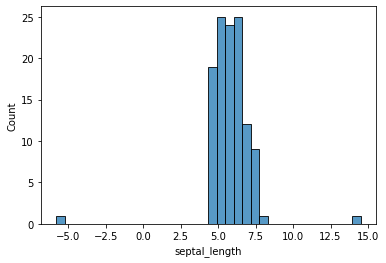

In [225]:
sns.histplot(df.septal_length)

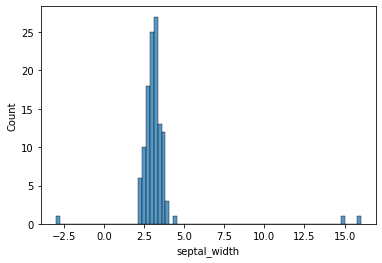

In [226]:
sns.histplot(df.septal_width)

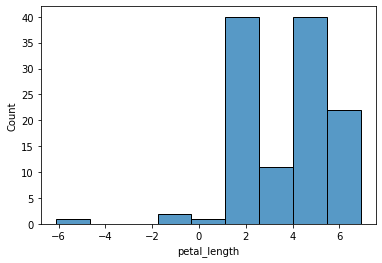

In [227]:
sns.histplot(df.petal_length)

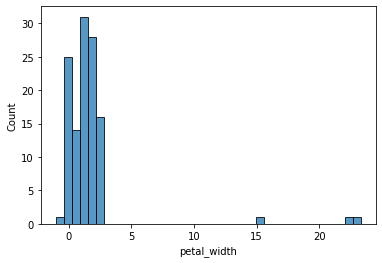

In [228]:
sns.histplot(df.petal_width)

# 이상치 처리

## septal_length

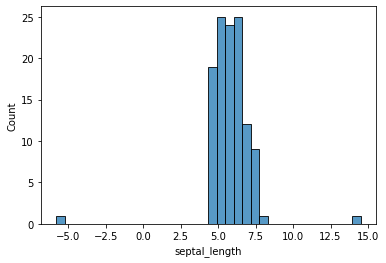

In [229]:
sns.histplot(df.septal_length)

In [230]:
print(df.loc[df.septal_length<2.5, "septal_length"])

41   -5.8
Name: septal_length, dtype: float64


In [231]:
print(df.loc[df.septal_length>10.0, "septal_length"])

90    14.5
Name: septal_length, dtype: float64


전혀 동떨어진 -5.8, 14.5의 값을 이 둘을 제외한 것들의 최소값 최대값으로 바꾸자.

In [232]:
filtered = df.loc[ (df.septal_length>=2.5) & (df.septal_length<=10.0), "septal_length"]
print(filtered.count())
min = filtered.min()
max = filtered.max()

print("min = ",min)
print("max = ",max)



115
min =  4.4
max =  7.9


In [233]:
df.loc[ df.septal_length<2.5, "septal_length"] = min
df.loc[ df.septal_length>10.0, "septal_length"] = max

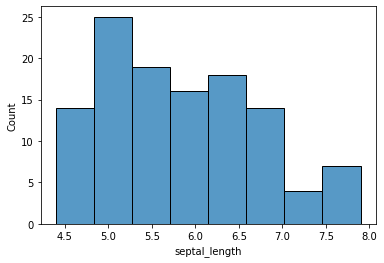

In [234]:
sns.histplot(df.septal_length)

## septal_width

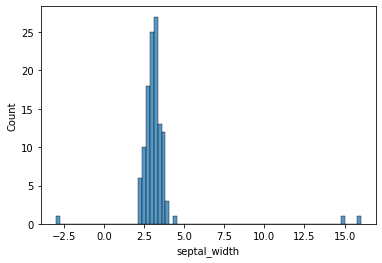

In [235]:
sns.histplot(df.septal_width)

In [236]:
print(df.loc[df.septal_width<0.0, "septal_width"])

55   -3.0
Name: septal_width, dtype: float64


In [237]:
print(df.loc[df.septal_width>10.0, "septal_width"])

59    16.0
74    15.0
Name: septal_width, dtype: float64


전혀 동떨어진 -3.0, 16.0, 15.0의 값을 이 둘을 제외한 것들의 최소값 최대값으로 바꾸자.

In [238]:
filtered = df.loc[ (df.septal_width>=0.0) & (df.septal_width<=10.0), "septal_width"]
print(filtered.count())
min = filtered.min()
max = filtered.max()

print("min = ",min)
print("max = ",max)

115
min =  2.2
max =  4.4


In [239]:
df.loc[ df.septal_width<2.5, "septal_width"] = min
df.loc[ df.septal_width>10.0, "septal_width"] = max

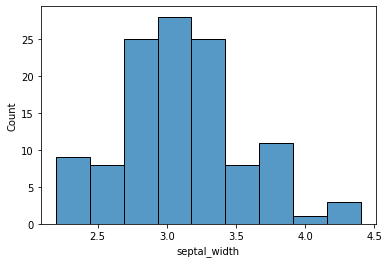

In [240]:
sns.histplot(df.septal_width)

## petal_length

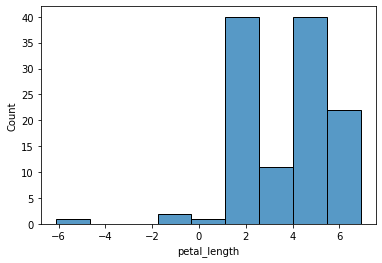

In [241]:
sns.histplot(df.petal_length)

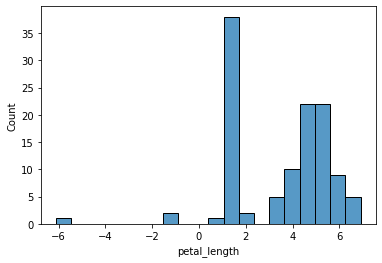

In [242]:
sns.histplot(df.petal_length, bins=20)

In [243]:
print(df.loc[df.petal_length<0.0, "petal_length"])

73    -6.1
89    -1.3
105   -1.4
Name: petal_length, dtype: float64


전혀 동떨어진 0보다 작은 값들을 제외한 것들의 최소값 최대값으로 바꾸자.

In [244]:
filtered = df.loc[ (df.petal_length>0.0), "petal_length"]
print(filtered.count())
min = filtered.min()
max = filtered.max()

print("min = ",min)
print("max = ",max)

114
min =  1.0
max =  6.9


In [245]:
df.loc[ df.petal_length<0.0, "petal_length"] = min

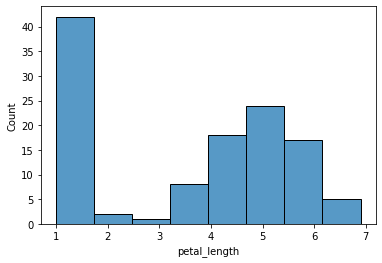

In [246]:
sns.histplot(df.petal_length)

## petal_width

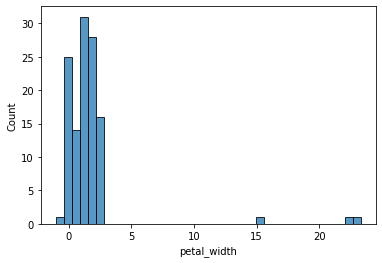

In [247]:
sns.histplot(df.petal_width)

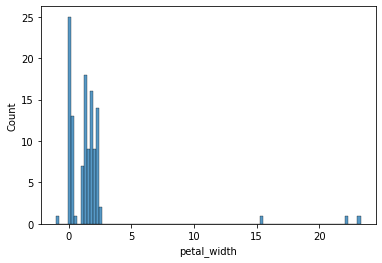

In [248]:
sns.histplot(df.petal_width, bins=100)

In [249]:
print(df.loc[df.petal_width>5.0, "petal_width"])

70     22.2
81     15.4
102    23.3
Name: petal_width, dtype: float64


전혀 동떨어진 5.0보다 큰 값들을 제외한 것들의 최대값으로 처리하자.

In [250]:
filtered = df.loc[ (df.petal_width<5.0), "petal_width"]
print(filtered.count())
min = filtered.min()
max = filtered.max()

print("min = ",min)
print("max = ",max)


115
min =  -1.0
max =  2.5


In [251]:
df.loc[ df.petal_width>5.0, "petal_width"] = max

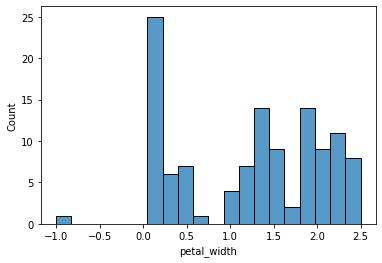

In [252]:
sns.histplot(df.petal_width, bins=20)

In [253]:
print(df.loc[df.petal_width<0.0, "petal_width"])

119   -1.0
Name: petal_width, dtype: float64


0.0 보다 작은 것은 이를 제외한 것들의 최소값으로 처리하자.

In [254]:
filtered = df.loc[ (df.petal_width>=0.0), "petal_width"]
print(filtered.count())
min = filtered.min()
max = filtered.max()

print("min = ",min)
print("max = ",max)

117
min =  0.1
max =  2.5


In [255]:
df.loc[ df.petal_width<0.0, "petal_width"] = min

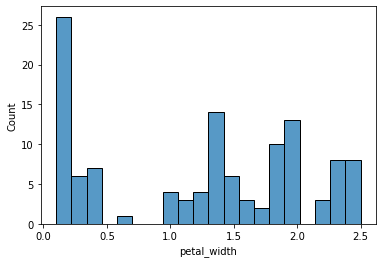

In [256]:
sns.histplot(df.petal_width, bins=20)

# 결측치 처리

In [257]:
print(df.isnull().any())

septal_length     True
septal_width      True
petal_length      True
petal_width       True
color             True
class             True
color_code       False
dtype: bool


In [258]:
print(df.isnull().sum())

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            3
class            1
color_code       0
dtype: int64


## class

class 값이 없는 것은 버리자

In [259]:
print(df['class'].isnull().any())

True


In [260]:
df.loc[df['class'].isnull()]

,septal_length,septal_width,petal_length,petal_width,color,class,color_code
79,6.4,2.2,1.9,2.0,NaN,NaN,-1


In [261]:
working_df = df.loc[~df['class'].isnull()]

In [262]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  116 non-null    float64 
 1   septal_width   117 non-null    float64 
 2   petal_length   116 non-null    float64 
 3   petal_width    117 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
 6   color_code     119 non-null    int8    
dtypes: category(1), float64(5), int8(1)
memory usage: 5.9 KB


In [263]:
print(working_df['class'].isnull().any())

False


In [264]:
print(working_df.isnull().sum())

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            2
class            0
color_code       0
dtype: int64


## color

In [265]:
df.loc[df['color'].isnull()]

,septal_length,septal_width,petal_length,petal_width,color,class,color_code
52,6.1,2.8,4.0,1.3,NaN,1.0,-1
79,6.4,2.2,1.9,2.0,NaN,NaN,-1
92,5.1,3.5,1.4,0.3,NaN,0.0,-1


-1로 코딩되었다. 내비려 두자

## 나머지 실수 컬럼들

평균값으로 처리하자

In [266]:
working_df = working_df.fillna(working_df.mean())

In [267]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   septal_length  119 non-null    float64 
 1   septal_width   119 non-null    float64 
 2   petal_length   119 non-null    float64 
 3   petal_width    119 non-null    float64 
 4   color          117 non-null    category
 5   class          119 non-null    float64 
 6   color_code     119 non-null    int8    
dtypes: category(1), float64(5), int8(1)
memory usage: 5.9 KB


## 뒷정리

In [268]:
working_df.isnull().any()

septal_length    False
septal_width     False
petal_length     False
petal_width      False
color             True
class            False
color_code       False
dtype: bool

In [269]:
working_df.drop('color', axis='columns', inplace=True)

In [270]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  119 non-null    float64
 1   septal_width   119 non-null    float64
 2   petal_length   119 non-null    float64
 3   petal_width    119 non-null    float64
 4   class          119 non-null    float64
 5   color_code     119 non-null    int8   
dtypes: float64(5), int8(1)
memory usage: 5.7 KB


In [271]:
working_df.isnull().any().any()

False

# Normalization

In [272]:
normalized_df = ( working_df - working_df.min() ) / ( working_df.max() - working_df.min())

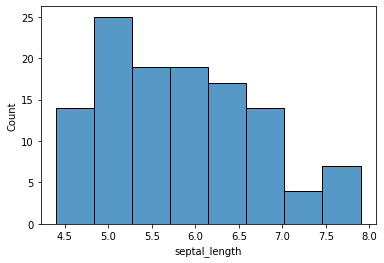

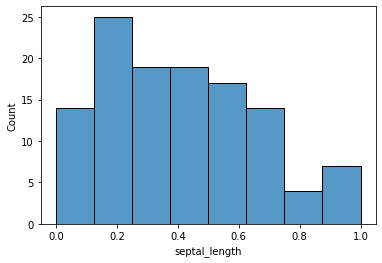

In [273]:
sns.histplot(working_df.septal_length)
plt.show()
sns.histplot(normalized_df.septal_length)
plt.show()

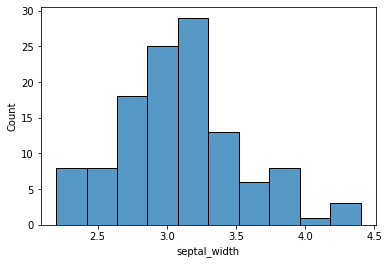

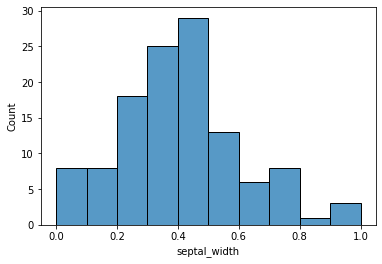

In [274]:
sns.histplot(working_df.septal_width)
plt.show()
sns.histplot(normalized_df.septal_width)
plt.show()

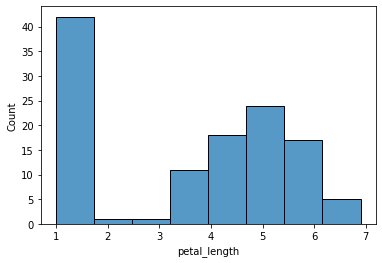

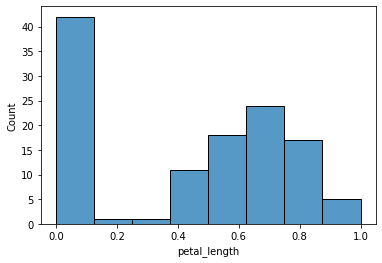

In [275]:
sns.histplot(working_df.petal_length)
plt.show()
sns.histplot(normalized_df.petal_length)
plt.show()

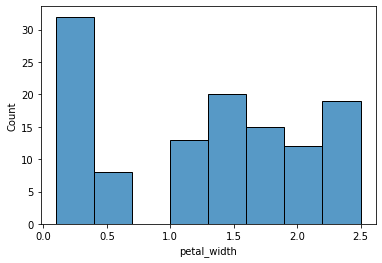

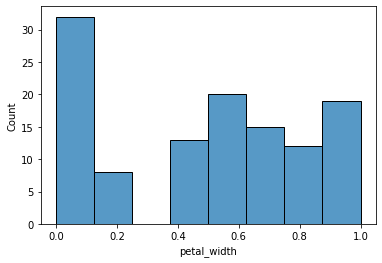

In [276]:
sns.histplot(working_df.petal_width)
plt.show()
sns.histplot(normalized_df.petal_width)
plt.show()

In [277]:
normalized_df

,septal_length,septal_width,petal_length,petal_width,class,color_code
0,0.571429,0.272727,0.779661,0.875000,1.0,0.666667
1,0.171429,0.000000,0.389831,0.375000,0.5,1.000000
2,0.142857,0.136364,0.593220,0.666667,1.0,1.000000
3,0.142857,0.409091,0.084746,0.000000,0.0,0.333333
4,0.371429,0.727273,0.118644,0.083333,0.0,0.333333
...,...,...,...,...,...,...
115,0.314286,0.181818,0.576271,0.458333,0.5,0.666667
116,0.371429,0.363636,0.447253,0.458333,0.5,0.666667
117,0.000000,0.318182,0.067797,0.041667,0.0,0.666667
118,0.114286,0.363636,0.067797,0.000000,0.0,0.333333


In [280]:
target_column_names = ["septal_length", "septal_width", "petal_length", "petal_width"]
working_df[target_column_names] = normalized_df[target_column_names]

In [281]:
working_df

,septal_length,septal_width,petal_length,petal_width,class,color_code
0,0.571429,0.272727,0.779661,0.875000,2.0,1
1,0.171429,0.000000,0.389831,0.375000,1.0,2
2,0.142857,0.136364,0.593220,0.666667,2.0,2
3,0.142857,0.409091,0.084746,0.000000,0.0,0
4,0.371429,0.727273,0.118644,0.083333,0.0,0
...,...,...,...,...,...,...
115,0.314286,0.181818,0.576271,0.458333,1.0,1
116,0.371429,0.363636,0.447253,0.458333,1.0,1
117,0.000000,0.318182,0.067797,0.041667,0.0,1
118,0.114286,0.363636,0.067797,0.000000,0.0,0
